<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class18_TimeSeries_AUSweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST3512 Class - 18    
**Time Series Analysis**         
**Australia Weather and Wine Sales Data**    
    
1. What is **time series**?    
2. Working with **time series** in `Pandas`    
3. "Daily minimum temperatures in Melbourne" dataset    
4. **Time series** data wrangling    
5. Resampling **time series** data    
6. **Time series** Rolling Average (Moving Average, Running Average)
7. Exercise: **Time Series** and Forecasting    
- APPENDIX: Summary and References     
    
    
<center><i>This notebook is available online at <a href=https://bit.ly/cst3512cl18>bit.ly/cst3512cl18</a></i></center>    
    
*courtesy of Professor Elena Filatova, CUNY CityTech, 2022; updated 2023 by Professor Patrick.* 


## Housekeeping    

Imports and intialization required for this notebook    

In [1]:
# import pandas library 
import pandas as pd

In [50]:
# import statistical decompoosition of seasonality from statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
# import matplotlib library and objects
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [14]:
# Let's change the size of figure drown by matplotlob. figsize represents width & height tuple in inches
rcParams['figure.figsize'] = (16, 6)

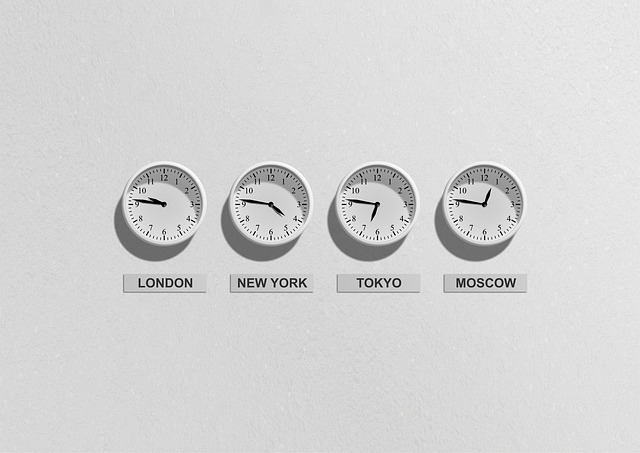

*^image by Michael Jarmoluk on Pixabay.com*   



---



##1.  What is **time series**?


Readings:
* [Time Series Analysis with Pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
* [Brief Tutorial](https://towardsdatascience.com/time-series-analysis-for-beginners-8a200552e332)


A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. A time series can be taken on any variable that changes over time.

The usage of time series models is twofold:

* Obtain an understanding of the underlying forces and structure that produced the observed data;
* Fit a model and proceed to forecasting, monitoring or even feedback and feedforward control.

Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, intelligent transport and trajectory forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series are very frequently plotted via line charts.

Here is information on a few time series examples in the real world:

* [Central England Temperatures 1659-2016](http://clivebest.com/blog/?p=7603)
* [U.S. Real GDP Per Capita (1900 – 2017): Current Economy vs Historical Trend Line](https://bfi.uchicago.edu/insight/chart/u-s-real-gdp-per-capita-1900-2017-current-economy-vs-historical-trendline/)
* [New York City's overall water consumption](https://www.reddit.com/r/dataisbeautiful/comments/9tzmkp/oc_surprisingly_new_york_citys_overall_water/)



---



##2. Working with **time series** in pandas

Pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the [NumPy](https://numpy.org/) `datetime64` and `timedelta64` dtypes, pandas consolidated a large number of features from other Python libraries as well as created a tremendous amount of new functionality for manipulating time series data.

In working with time series data, you will frequently seek to:

* generate sequences of fixed-frequency dates and time spans
* conform or convert time series to a particular frequency
* compute "relative" dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year) or "roll" dates forward or backward

The following examples demonstrate how to work with time, date and datetime data using pandas.

###2.a `.daterange()`

First of all, let's generate a list of datetime values for 3 subsequent days starting from **03/01/2023** with the interval equals to a **one hour interval**. The [date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html?highlight=date_range) function can return such list in [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.strftime.html) format. We simply  define the left bound for generating dates start (`03/01/2023` in our case), the right bound for generating dates end or the amount of intervals periods (`3*24` in this case, because we are going to cover three days) and preferable frequency freq ('H' in this case)

In [ ]:
example_range = pd.date_range(start='3/01/2023', periods=3*24, freq='H')
print("Amount of elements:", len(example_range.values))
example_range[:25]

In the same way we can define any other period in the `freq` attribute, for example, days. The full list of possible values can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

Time series can be created that can be manipulated naturally and easily. The first step to create the range of dates for the time series (as mentioned above). The `dates` **.datarange()** below starts at `2023-01-25` and ends at `2023-02-25`. Frequency of the data is one month (`freq='D'`).

In [ ]:
dates = pd.date_range('2023-01-25', '2023-02-24', freq='D')
dates

###2.b `.to_datetime()`    


To convert a `Series` or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function. When passed a `Series`, this returns a `Series` (with the same index), while a list-like is converted to a `DatetimeIndex`:

Let's first look at the **Series** created with a brief list of dates. 

In [ ]:
print(pd.Series(['Jul 31, 2021', 'October 31, 2022', '2022-12-10', None]))

Then we can pass that same **Series** to the `.to_datetime()` method to create a **datetime** series.

In [ ]:
pd.to_datetime(pd.Series(['Jul 31, 2021', 'October 31, 2022', '2022-12-10', None]))

In the **datetime** series above, `NaT` represents missing values of **datetime** type.

The `.to_datetime()` method converts dates according to `yyyy-mm-dd` format independently of the input with the exception that missing data is recorded as `NaT`.

In [ ]:
pd.to_datetime(['2005/11/23', '2010.12.31', 'Jul 31, 2021', 'October 31, 2022', '2022-12-10', None])

If you use dates which start with the day first (i.e. European style), you can pass the `dayfirst` flag:



In [ ]:
pd.to_datetime(['04-01-2012 10:00', '14-01-2012', '01-14-2012'], dayfirst=True)

You can see in the above example that the `dayfirst` flag is not strict, so if a date can’t be parsed with the day being first it will be parsed as if `dayfirst` were `False`.

If you pass a single string to `to_datetime`, it returns a single [Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.time.html?highlight=time%20stamp).  `Timestamp` can accept string input. Note that `Timestamp` does not accept string parsing options such as `dayfirst` or `format`, use `to_datetime` if these are required.

In [ ]:
pd.to_datetime('2013/09/23')

<center><h3><b><u>`.to_datetime()` Parameters</b></u></h3></center> 

<b>Syntax:</b>    
    
<b>pandas.to_datetime</b>(arg, **errors**=’raise’, **dayfirst**=False, **yearfirst**=False, **utc**=None, **format**=None, **exact**=True, **unit**=None, **infer_datetime_format**=False, **origin**=’unix’, **cache**=False)
    
<b>Arguments:</b>    
  - <b><u>arg</b></u>: An integer, string, float, list or dict object to convert in to Date time object.    
  - **errors**{`ignore`, `raise`, `coerce`}, default `raise`;    
    - If `raise`, then invalid parsing will raise an exception,    
    - If `coerce`, then invalid parsing will be set as `NaT`, or    
    - If `ignore`, then invalid parsing will return the input.    
  - <b><u>dayfirst</b></u>: Boolean value, places day first if True.    
  - <b><u>yearfirst</b></u>: Boolean value, places year first if True.    
  - <b><u>utc</b></u>: Boolean value, Returns aware time in UTC if True.  Controls timezone-related parsing, localization and conversion.    
    - If `True`, the function always returns a timezone-aware UTC-localized Timestamp, Series or DatetimeIndex. To do this, timezone-naive inputs are localized as UTC, while timezone-aware inputs are converted to UTC.    
    - If `False` (default), inputs will not be coerced to UTC. Timezone-naive inputs will remain naive, while timezone-aware ones will keep their time offsets. Limitations exist for mixed offsets (typically, daylight savings), see Examples section for details.    
  - <b><u>format</b></u>: The `strftime` to parse time, e.g. `"%d/%m/%Y"`. Note that `"%f"` will parse all the way up to nanoseconds. See [strftime documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for more information on choices.    
  - <b><u>exact</b></u>: Boolean value. Controls how format is used:    
    - If `True`, require an exact format match.    
    - If `False`, allow the format to match anywhere in the target string.        
  - <b><u>unit</b></u>: The unit of the arg (`D,s,ms,us,ns`) denote the unit, which is an integer or float number. This will be based off the origin. Example, with `unit='ms'` and `origin='unix'`, this would calculate the number of milliseconds to the unix epoch start.    
  - <b><u>infer_datetime_format</b></u>: Boolean value, ... if True.    
  - <b><u>origin</b></u>: The reference (origin) date.  The numeric values would be parsed as number of units (defined by unit) since this reference date.    
    - If `unix` (or `POSIX`) time; origin is set to 1970-01-01.    
    - If `julian`, unit must be 'D', and origin is set to beginning of Julian Calendar. Julian day number 0 is assigned to the day starting at noon on `January 1, 4713 BC`.    
    - If `Timestamp` convertible, origin is set to `Timestamp` identified by origin. 
  - <b><u>cache</b></u>: Boolean value, default is `True`. If `True`, use a cache of unique, converted dates to apply the datetime conversion. May produce significant speed-up when parsing duplicate date strings, especially ones with timezone offsets. The cache is only used when there are at least 50 values. The presence of out-of-bounds values will render the cache unusable and may slow down parsing.    
   

    




---



##3. "Daily minimum temperatures in Melbourne" dataset

We're going to be looking some Daily minimum temperatures in Melbourne data from [DataMarket](https://en.wikipedia.org/wiki/DataMarket). This dataset is a list of days and daily minimum temperatures. You can see the data set [here](https://github.com/ef2020/TextFiles/blob/master/daily-minimum-temperatures-in-melbourne.csv). To download the dataset use the `raw` version of the file.  By default, it assumes that the fields are comma-separated. We will use it for reading the dataset file (we called it as "daily-minimum-temperatures-in-melbourne.csv")

In [ ]:
!curl https://raw.githubusercontent.com/ef2020/TextFiles/master/daily-minimum-temperatures-in-melbourne.csv -o daily-minimum-temperatures-in-melbourne.csv

In [ ]:
melbourne_temp = pd.read_csv("daily-minimum-temperatures-in-melbourne.csv", 
                             skiprows=1,  # Allows to skip the header
                             names=["date", "temp"])  # Let's name columns in such way
melbourne_temp

Let's look at columns' types using `dtypes` method. Pay attention to the dataype for the date attribute. 

In [ ]:
melbourne_temp.dtypes

Let us visualize the data we have. In the previous example we read data and got an Object type. 

To plot the data we have to convert the column "temp" to numeric using the `to_numeric` function. By doing this we change type to `float64` and we can use pyplot to visualize our dataset. We also should to apply the `to_datetime` function to the "date" column. It will allow using its values in filters (see below).

In [ ]:
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])

In [ ]:
melbourne_temp.head(3)

In [ ]:
melbourne_temp.dtypes

In [ ]:
melbourne_temp.set_index('date', inplace=True)

In [ ]:
melbourne_temp.head(3)

In [22]:
# Execute this housekeeping if you have not already run it
# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

# Let's change the size of figure drown by matplotlob. figsize represents width & height tuple in inches
rcParams['figure.figsize'] = (16, 6)

In [ ]:
# Convert "date" column
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])
# Let's convert data to numeric so we can plot it
melbourne_temp['temp'] = pd.to_numeric(melbourne_temp['temp'])

melbourne_temp.set_index('date', inplace=True)

# Let's look at type of "temp" column
print("Type of 'temp' column:", melbourne_temp["temp"].dtypes)
melbourne_temp.head()

Now we can see how the considering time series for temperature in Melbourne looks.

In [ ]:
melbourne_temp.plot()
plt.show()

Notice that date labels were displayed automatically.



---



##4. **Time series** data wrangling

Time series data wrangling or manipulation of the data can help develop an idea of the distribution and spread of values.

This may help with ideas of data scaling and even data cleaning that can later be performed as part of preparing the dataset for modeling.

First of all let's find the minimum temperature for all the time by specifing data and calling `min()` function

In [ ]:
melbourne_temp.min()

It is possible to select a specific time range defining the respecive year or month like this.

In [ ]:
melbourne_temp['1981-01']

or even date between some dates (recall list slicing from CST 1101)

In [ ]:
melbourne_temp['1990-01-05':'1990-01-12']

Thus we can build a plot for some sample

In [ ]:
melbourne_temp['1981-02'].plot()
plt.show()

and apply any functions including statistical, for example, let's calculate the average temperature for the above plot

In [ ]:
melbourne_temp['1981-02'].mean()

And finally, we count the number of dates where temperature was less then 2 degrees

In [ ]:
print("Days with temperature less than 2 degrees:", (melbourne_temp < 2).sum().values[0])



---



##5. Resampling **time series** data   

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

* **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.
* **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

There are perhaps two main reasons why you may be interested in resampling your time series data:

* **Problem Framing**: Resampling may be required if your data is available at the same frequency that you want to make predictions.
* **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.
Let’s make resampling more concrete by looking at a real dataset and some examples.

We will use previous dataset "Daily minimum temperatures in Melbourne, Australia, 1981-1990"

Imagine that we want average weekly temparature information. In this case we have to unsample the information from daily to weekly.

We can use this function to transform our daily dataset into a weekly dataset by calling resampling and specifying the preferred frequency of calendar week frequency or "W".

###5.a **Time Series Frequency for `.resample()` Periodicity**   

<b><u>Most commonly used time series frequency are</b></u>:     
 - <b><u>W</b></u>:  weekly frequency    
 - <b><u>M</b></u>:  month end frequency    
 - <b><u>SM</b></u>:  semi-month end frequency (15th and end of month)    
 - <b><u>Q</b></u>:  quarter end frequency    

<b><u>The full list of Pandas `DateTime` frequency codes that can be used as `.resample()` rules</b></u>

 - <b><u>B</b></u>:  business day frequency    
 - <b><u>C</b></u>:  custom business day frequency    
 - <b><u>D</b></u>:  calendar day frequency    
 - <b><u>W</b></u>:  weekly frequency    
 - <b><u>M</b></u>:  month end frequency    
 - <b><u>SM</b></u>:  semi-month end frequency (15th and end of month)    
 - <b><u>BM</b></u>:  business month end frequency    
 - <b><u>CBM</b></u>:  custom business month end frequency    
 - <b><u>MS</b></u>:  month start frequency   
 - <b><u>SMS</b></u>:  semi-month start frequency (1st and 15th)    
 - <b><u>BMS</b></u>:  business month start frequency    
 - <b><u>CBMS</b></u>:  custom business month start frequency    
 - <b><u>Q</b></u>:  quarter end frequency    
 - <b><u>BQ</b></u>:  business quarter end frequency    
 - <b><u>QS</b></u>:  quarter start frequency    
 - <b><u>BQS</b></u>:  business quarter start frequency    
 - <b><u>A, Y</b></u>:  year end frequency    
 - <b><u>BA, BY</b></u>:  business year end frequency    
 - <b><u>AS, YS</b></u>:  year start frequency    
 - <b><u>BAS, BYS</b></u>:  business year start frequency    
 - <b><u>BH</b></u>:  business hour frequency    
 - <b><u>H</b></u>:  hourly frequency    
 - <b><u>T, min</b></u>:  minutely frequency    
 - <b><u>S</b></u>:  secondly frequency    
 - <b><u>L, ms</b></u>:  milliseconds    
 - <b><u>U, us</b></u>:  microseconds    
 - <b><u>N</b></u>:  nanoseconds    


In [ ]:
melbourne_temp.resample('W').mean().head(10)

Check yourself that in the "temp" is realy average temperature for respective week.

Instead of creating new rows between existing observations, the [resample()](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html) function in pandas will group all observations by the new frequency.

This operation is called *downsampling*.

We can downsample the data using the alias "A" for year-end frequency and this time use `min` to calculate the miminum (or `max` for maximum, everything you need) temperature of each year.

In [ ]:
melbourne_temp.resample('A').min()

Resampling is also a fast way to smooth in some essence the time series. For instance, the time series of monthly averages has much less peaks or outliers and allows tracking the periodicity.

Much accurate way to smooth a time series is the cacluation of rolling average that is the average value of the current point and N previous points. It can be calcualted using [rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling) pandas's method where we should define the window, i.e. amount of points for average calculation.



---



##6. **Time series** Rolling Average (Moving Average, Running Average)

(https://en.wikipedia.org/wiki/Moving_average)

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms.

Rolling Average is an example of a smoothing technique which is applied to time series to remove the fine-grained variation between time steps. (https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/)

In [ ]:
# Draw initial time series and make it transparent
ax = melbourne_temp.plot(alpha=0.25)
# Draw montly average values
melbourne_temp.resample('M').mean().plot(ax=ax)
# Draw roling average that takes into account 25 points
melbourne_temp.rolling(10).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

If you set the hourly frequency in the `resample()` function, then NaN values will be created, because there are no more tiny distribution of the temperature.

This procedure is called *upsampling*. Before you run this procedure, think if we have the temperature values for every hour. 

What do you expect to see? 

In [ ]:
upsampled = melbourne_temp.resample('H').mean()
upsampled.head(30)

But we can [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.interpolate.html) the missing values at this new frequency.

The Series pandas's object provides the interpolate function to interpolate missing values. A good starting point is to use a `linear interpolation`. This draws a straight line between available data and fills in values at the chosen frequency from this line.

In [ ]:
upsampled.head(30)

In [ ]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)



---



##7. Exercise: **Time Series** and Forecasting

Based on the book Introduction to Time Series and Forecasting by Brockwell and Davis

*Run the housekeeping in the following cell if you have not already:*

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

**Run the following two cells of housekeeping, even if you have run all of the housekeeping at the start of this notebook.**    

In [36]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
# This is just to select the style of the generated plots. Feel free to experiment
# and select other styles that you may like better. Notice that Style sheets are 
# designed to be composed together. So you can have a style sheet that customizes 
# colors and a separate style sheet that alters element sizes for presentations. 
# print(plt.style.available)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])



---



### 7.a Australian red wine "sales", (thousands of litres) monthly, Jan 80 - Oct 91

The file `AusWineSales.csv` contains the monthly sales of Australian red wines in for the period Jan-1980 to Oct-1991. Let us take a peak at the [data file](https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv).

Additional Time Series Analysis of the Australian Wines data set can be found [here](https://github.com/rajansharm/Time-Series-Analysis/blob/master/Rajan_TimeSeries.ipynb). 

In [ ]:
!curl https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv -o AusWineSales.csv

In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv")  # if you use this line, you do not 
                                                                                                               # need the above cell with !curl
#df = pd.read_csv("AusWineSales.csv")

In [ ]:
df.head(5)

Pandas is relatively smart and can infer the data type of a column.

In [ ]:
df.dtypes

In [ ]:
df.describe

In this case pandas figured out that Sales is a `number`, but not that Date is an `object`.

We can now try to plot directly the contents of the dataframe.

In [ ]:
df.plot()

Why do we have a number on the x-axis?

The plot would look better if we had the x-axis to be a date, instead of a number. For that, we use the corresponding Pandas functions to convert the columns into the appropriate formats. We also tell Pandas to convert the Date column into the key for each row.

In [ ]:
df["YearMonth"] = pd.to_datetime(df["YearMonth"])
df.set_index(keys="YearMonth", inplace=True)
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.plot()

In [44]:
df_Red = df[["Red"]]
df_Sparkling = df[["Sparkling"]]
df_Sweetwhite = df[["Sweetwhite"]]

In [ ]:
df_Red.plot(figsize=(15,7), grid=True)

In [ ]:
df_Sparkling.plot(figsize=(15,7), grid=True)

In [ ]:
df_Sweetwhite.plot(figsize=(15,7), grid=True)

It appears from the graph that the sales have an upward trend and a seasonal pattern with a peak in July and a trough in January.



###7.b Jumping Ahead: Lag plots, autocorrelation plots, and decompositions.

Pandas provides two types of plots that can be used for the analysis of time series: the `lag_plot` and the `autocorrelation_plot`. We can also use the seasonal decomposition functionality of statsmodels to separate the time series into a **trend, seasonal component**, and **residual noise**. We will go quickly over these for now, mainly for demo purposes. Proper treatment of these topics require deeper analysis which we will cover in our next class.

####7.b1 Lag plot

The lag plot shows the value of the series at time $t$ vs. its value at time $t+1$. If there is no dependency (i.e., the time series is noise) then the lag plot is a scatterplot without any sign of correlation. If we can see a pattern and a correlation, then the series exhibits autocorrelation. For example, below we can see that there is a rather strong correlation of the two variables, indicating that the sales in time $t+1$ is similar to the sales at time $t$.

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_Red["Red"])

####7.b2 Autocorrelation Plot
In a more general setting, we want to also see if the value of the series at time $t$ is predictive of the value at time $t+n$. Such dependency would indicate that there is autocorrelation in the series. The autocorrelation plot shows the correlation value for various values of $n$.

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_Red["Red"])



---



###7.c Trend/Seasonal Decomposition

Analyze red wine sales by **season**. 

*Execute the following cell of housekeeping if you have not already run it.*

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<center><h3><b><u>`.seasonal_decompose()` Parameters</b></u></h3></center>   
    
<b><u>Arguments:</b></u>    

<b><u>endog</u></b>: array_like Data to be decomposed. Must be squeezable to 1-d.    
    
<b><u>period</u></b>: Periodicity of the sequence. If None and `endog` is a `pandas` **Series** or **DataFrame**, attempts to determine from endog. If endog is a `ndarray`, period must be provided.    
    
<b><u>seasonal</u></b>: Length of the seasonal smoother. Must be an odd integer, and should normally be `>= 7` (default).    
    
<b><u>trend</u></b>: Length of the trend smoother. Must be an odd integer. If not provided uses the smallest odd integer greater than 1.5 * period / (1 - 1.5 / seasonal), following the suggestion in the original implementation.    

In [ ]:
# We decompose assumming a 12-month periodicity. 
# There is a weekly component as well, which we ignore.
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
# Note: the following statement, from the original articel, uses a deprecated `freq` argument
# decomposition = seasonal_decompose(df_Red['Red'], model='multiplicative', freq=12)

# try it without specifying a period to see what it derives from the dataframe
decomposition = seasonal_decompose(df_Red['Red'], model='multiplicative')  
# try it with a period of 12 months
# decomposition = seasonal_decompose(df_Red['Red'], model='multiplicative', period=12)  

fig = plt.figure()  
fig = decomposition.plot()

####7.d Accessing individual components of the decomposition
Once we have the decomposed time series model, we can also access the different components.

For example, we can get the trend of the time series, after removing the seasonality component:

In [ ]:
# The outcome is a pandas Series, which is effectively the same as a single column of dataframe
decomposition.trend

In [ ]:
decomposition.trend.plot()

A directory listing of the attributes of the object `distribution` indicates that the following components are available for plotting and analysis:    
    
  - <b><u>observed</b></u>: the observed values in the Series    
  - <b><u>trend</b></u>: the trend component of the observed values    
  - <b><u>seasonal</b></u>: the seasonal component of the observed values   
  - <b><u>resid</b></u>:the residual (error) component of the observed values    
  - <b><u>weights</b></u>: the weights used for each observation    
   

In [ ]:
dir(decomposition)

We can plot and analyze each component.    

In [ ]:
decomposition.observed.plot()

In [ ]:
decomposition.trend.plot()

In [ ]:
decomposition.seasonal.plot()

In [ ]:
decomposition.resid.plot()

In [ ]:
decomposition.weights.plot()

###7.e What hypothesis can you test using **time series** analysis of wine sales data for Australia?

In [ ]:
### enter a list of hypotheses and how you would test them with time series analysis here...
###



---



## APPENDIX: Summary and Additional References    

For a thorough introductory discussion of **time series** with exhbits from Apple stock price data, see [The Basics: Time Series and Seasonal Decomposition](https://towardsdatascience.com/the-basics-time-series-and-seasonal-decomposition-b39fef4aa976) by Max Miller on TowardsDataScience.com   


See the article [ARIMA for Time Series with Python from MachineLearningMastery](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) on the development of analysis and use of the `ARIMA` model for the Melbourne temperature data set. 


*note: see the following CST3512 notebooks for additional time series material:*    

* **[CST3512_TimeSeries_AirPassengers](https://colab.research.google.com/drive/1t2InZbknRMJBmXs0gq0NcEhIuCduD3tq?usp=sharing)**    

* **[DataQuest Time Series Energy Tutorial](https://colab.research.google.com/drive/1TIVLt5XQWBpZGwonb3GTByHFo8LTcPL4?usp=sharing)**    


As mentioned at the start of this notebook, here is information on a few time series examples in the real world:

* [Central England Temperatures 1659-2016](http://clivebest.com/blog/?p=7603)
* [U.S. Real GDP Per Capita (1900 – 2017): Current Economy vs Historical Trend Line](https://bfi.uchicago.edu/insight/chart/u-s-real-gdp-per-capita-1900-2017-current-economy-vs-historical-trendline/)
* [New York City's overall water consumption](https://www.reddit.com/r/dataisbeautiful/comments/9tzmkp/oc_surprisingly_new_york_citys_overall_water/)





---

